# **Unsupervised Learning Tutorial - Iris Dataset**

This tutorial is a beginner-friendly introduction to the concepts of Principal Component Analysis (PCA) and K-means clustering, using the famous Iris dataset.

# Step 1: Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Step 2: Load the iris dataset

In [7]:
iris = load_iris()
X = pd.DataFrame(data=iris.data, columns=iris.feature_names)
#X = iris.data
# 'X' will be our feature matrix.

X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Step 3: Standardize the feature matrix

In [9]:
X = StandardScaler().fit_transform(X)

X
# We standardize the feature matrix 'X' to normalize the data within a particular range.
# This also helps in speeding up the calculations in an algorithm.

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      



# Step 4: Apply PCA

In [11]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
# PCA is a technique used to emphasize variation and bring out strong patterns in a dataset.
# We use it here to reduce the dimensionality of the data.



# Step 5: Create a DataFrame for the principal components

In [12]:

df = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
# We create a new DataFrame that will have the principal component values for all the samples.

In [13]:
df.head

<bound method NDFrame.head of      principal component 1  principal component 2
0                -2.264703               0.480027
1                -2.080961              -0.674134
2                -2.364229              -0.341908
3                -2.299384              -0.597395
4                -2.389842               0.646835
..                     ...                    ...
145               1.870503               0.386966
146               1.564580              -0.896687
147               1.521170               0.269069
148               1.372788               1.011254
149               0.960656              -0.024332

[150 rows x 2 columns]>

# Step 6: Apply K-Means

In [14]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
# K-means is a type of partitioning clustering, that is, it divides the data into k non-overlapping subsets (or clusters)
# without any cluster-internal structure or labels. This means, it's an unsupervised algorithm.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

# Step 7: Add the labels to the dataframe

In [15]:
df['labels'] = kmeans.labels_
# We add the K-means clustering labels to our DataFrame.

In [23]:
df.tail()

,principal component 1,principal component 2,labels
145,1.870503,0.386966,1
146,1.564580,-0.896687,2
147,1.521170,0.269069,1
148,1.372788,1.011254,1
149,0.960656,-0.024332,2


# Step 8: Visualize clusters

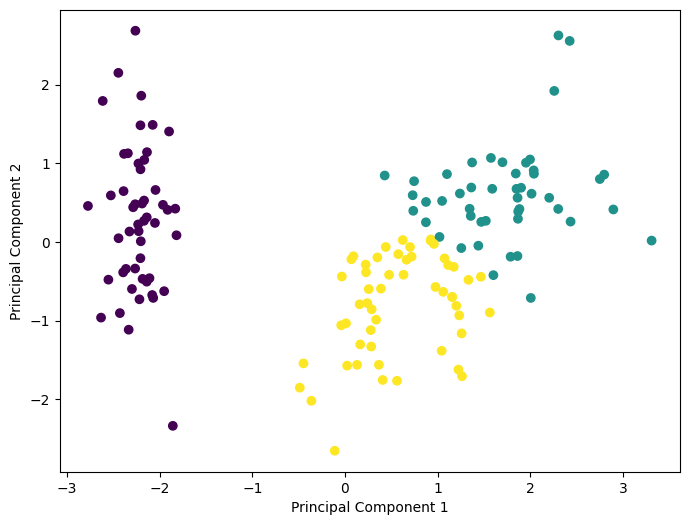

In [16]:

plt.figure(figsize=(8,6))
plt.scatter(df['principal component 1'], df['principal component 2'], c=kmeans.labels_)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
# We create a scatter plot of the two principal components and color it according to the K-Means cluster assignments.


# Step 9: Determine optimal number of clusters using the elbow method

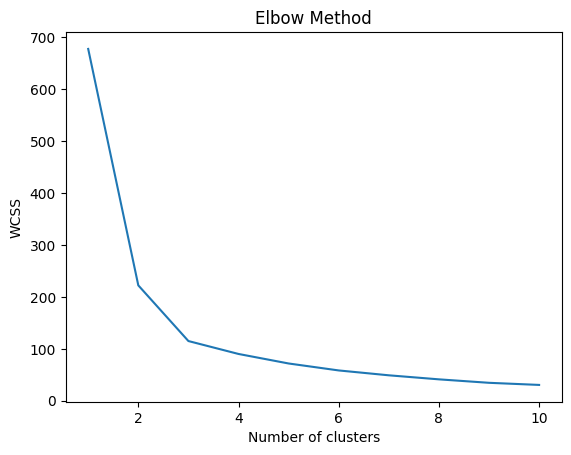

In [17]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Here we're using the elbow method to determine the optimal number of clusters.
# We run a loop to fit multiple k-means models and in each successive model,
# we increase the number of clusters. We record the sum of squared distances (WCSS) and plot it to observe 'The elbow'.

# Inertia decreases from 3 to 4 very slowly , so 3 was a good choice. 4 or 5 works fine too